# Stat 410 | Salary Project Report
# Rachel, Abdullah, Gustavo

## Importing Data & Data Cleaning

In [1]:
salary = read.csv('Salary Data.csv')
str(salary)

'data.frame':	375 obs. of  6 variables:
 $ ï..Age             : int  32 28 45 36 52 29 42 31 26 38 ...
 $ Gender             : Factor w/ 3 levels "","Female","Male": 3 2 3 2 3 3 2 3 2 3 ...
 $ Education.Level    : Factor w/ 4 levels "","Bachelor's",..: 2 3 4 2 3 2 3 2 2 4 ...
 $ Job.Title          : Factor w/ 175 levels "","Account Manager",..: 161 19 132 103 24 83 95 106 84 152 ...
 $ Years.of.Experience: num  5 3 15 7 20 2 12 4 1 10 ...
 $ Salary             : int  90000 65000 150000 60000 200000 55000 120000 80000 45000 110000 ...


In [2]:
salary$Age = salary$ï..Age

salary = subset(salary, select = -c(ï..Age))

str(salary)

'data.frame':	375 obs. of  6 variables:
 $ Gender             : Factor w/ 3 levels "","Female","Male": 3 2 3 2 3 3 2 3 2 3 ...
 $ Education.Level    : Factor w/ 4 levels "","Bachelor's",..: 2 3 4 2 3 2 3 2 2 4 ...
 $ Job.Title          : Factor w/ 175 levels "","Account Manager",..: 161 19 132 103 24 83 95 106 84 152 ...
 $ Years.of.Experience: num  5 3 15 7 20 2 12 4 1 10 ...
 $ Salary             : int  90000 65000 150000 60000 200000 55000 120000 80000 45000 110000 ...
 $ Age                : int  32 28 45 36 52 29 42 31 26 38 ...


## Exploratory Data Analysis

In [3]:
male = salary$Salary[salary$Gender == 'Male']
fem = salary$Salary[salary$Gender == 'Female']

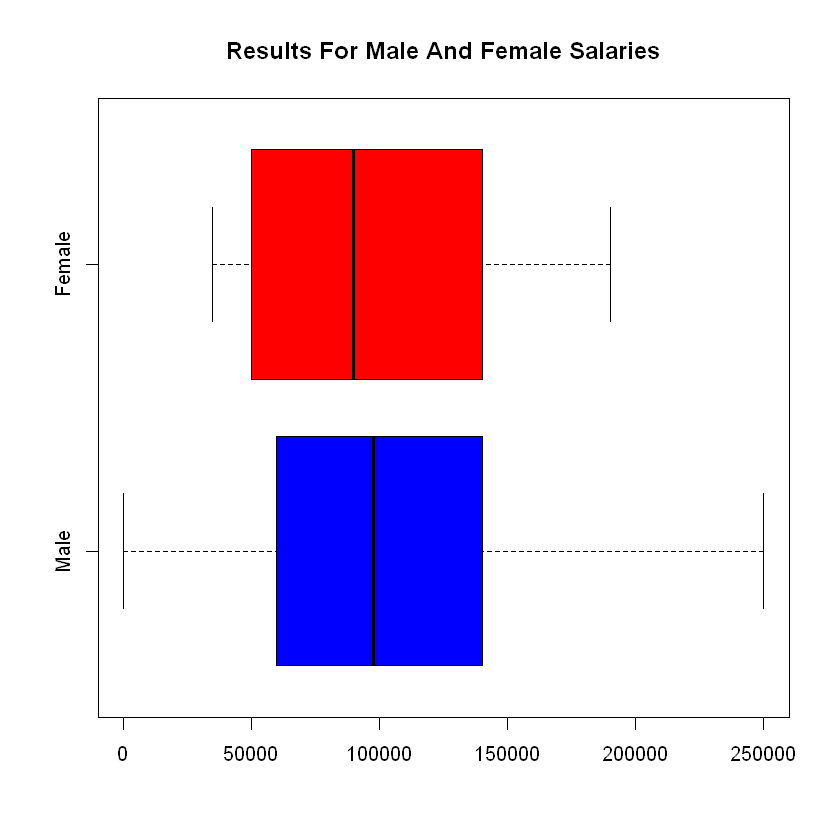

In [4]:
boxplot(male, fem, main = 'Results For Male And Female Salaries',
        names = c('Male','Female'), col = c( 'blue', 'red'), border = 'black',
        horizontal = TRUE)

In [5]:
levels(salary$Education.Level[])

[1] ""           "Bachelor's" "Master's"   "PhD"

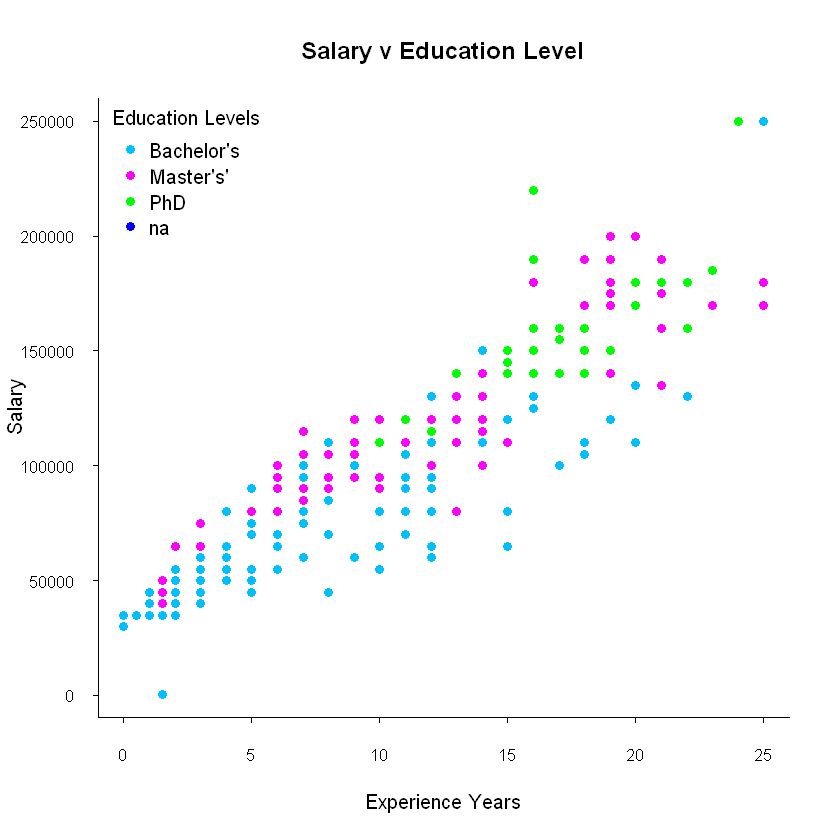

In [6]:
x = salary$Years.of.Experience
y = salary$Salary

plot(x,y, type = 'n', 
     main = 'Salary v Education Level',
     xlab = 'Experience Years', ylab = 'Salary',
     bty = 'l', las = 1, cex.axis = .8,
     tcl = -0.2)

points(x = salary$Years.of.Experience[salary$Education.Level == "Bachelor's"],
       y = salary$Salary[salary$Education.Level == "Bachelor's"], 
       pch = 16, col = 'deepskyblue')
points(x = salary$Years.of.Experience[salary$Education.Level == "Master\'s"],
       y = salary$Salary[salary$Education.Level == "Master\'s"], 
       pch = 16, col = 'magenta')
points(x = salary$Years.of.Experience[salary$Education.Level == "PhD"],
       y = salary$Salary[salary$Education.Level == "PhD"], 
       pch = 16, col = 'green')
points(x = salary$Years.of.Experience[salary$Education.Level == ''],
       y = salary$Salary[salary$Education.Level == ''], 
       pch = 16, col = 'blue')

leg_cols = c("deepskyblue", "magenta", "green", "blue")
leg_sym = c(16, 16, 16, 16)
leg_lab = c("Bachelor's", "Master\'s'", "PhD", "na")

legend('topleft',
       col = leg_cols, pch = leg_sym,
       legend = leg_lab, bty = "n",
       title = "Education Levels")

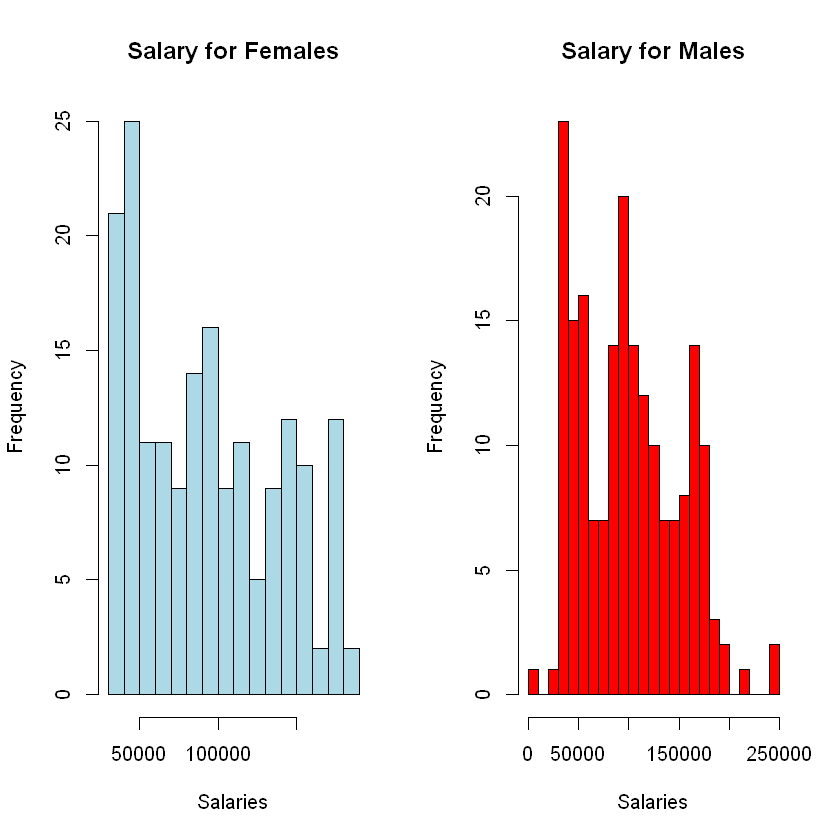

In [7]:
layout(matrix(1:2, 1, 2))
hist(fem, main = "Salary for Females", col = "lightblue", xlab = "Salaries", breaks = 20,
     freq = TRUE)
hist(male, main = "Salary for Males", col = "red", xlab = "Salaries", breaks = 20,
     freq = TRUE)

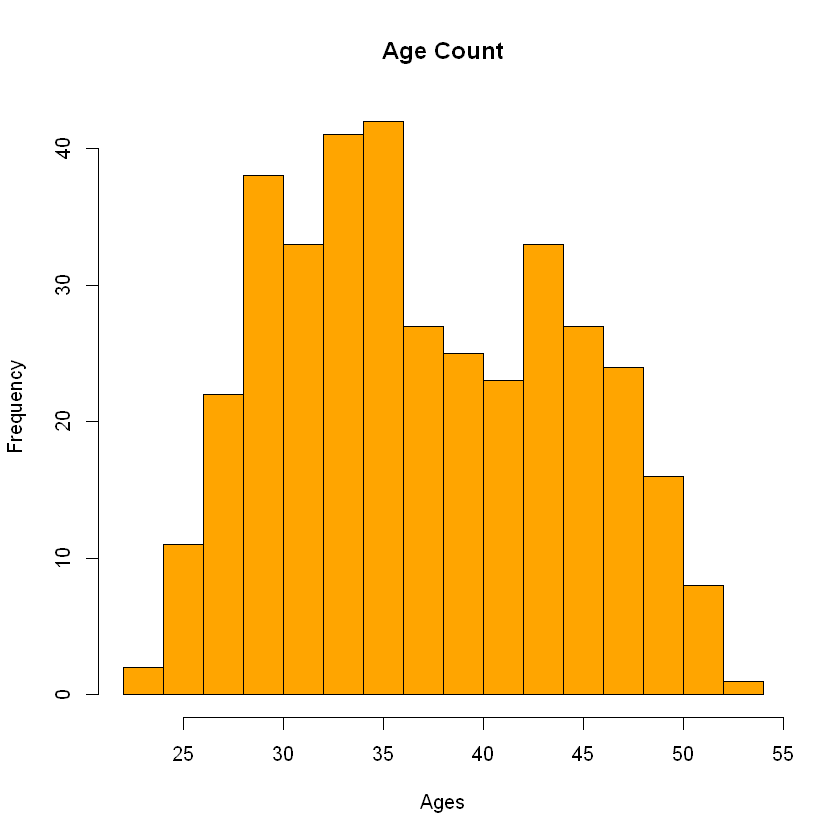

In [8]:
hist(salary$Age, main = "Age Count", col = 'orange', xlab = "Ages", ylab = "Frequency", 
     breaks = 20, freq = TRUE)

## Statistical Analysis

In [9]:
age_form = Salary ~ Gender + Education.Level + Years.of.Experience + Age
form = Salary ~ Gender + Education.Level + Years.of.Experience 

In [10]:
X = model.matrix(form, data = salary)
X[1,]

age_X = model.matrix(age_form, data = salary)

(Intercept)              GenderFemale                GenderMale 
                        1                         0                         1 
Education.LevelBachelor's   Education.LevelMaster's        Education.LevelPhD 
                        1                         0                         0 
      Years.of.Experience 
                        5

corrplot 0.92 loaded


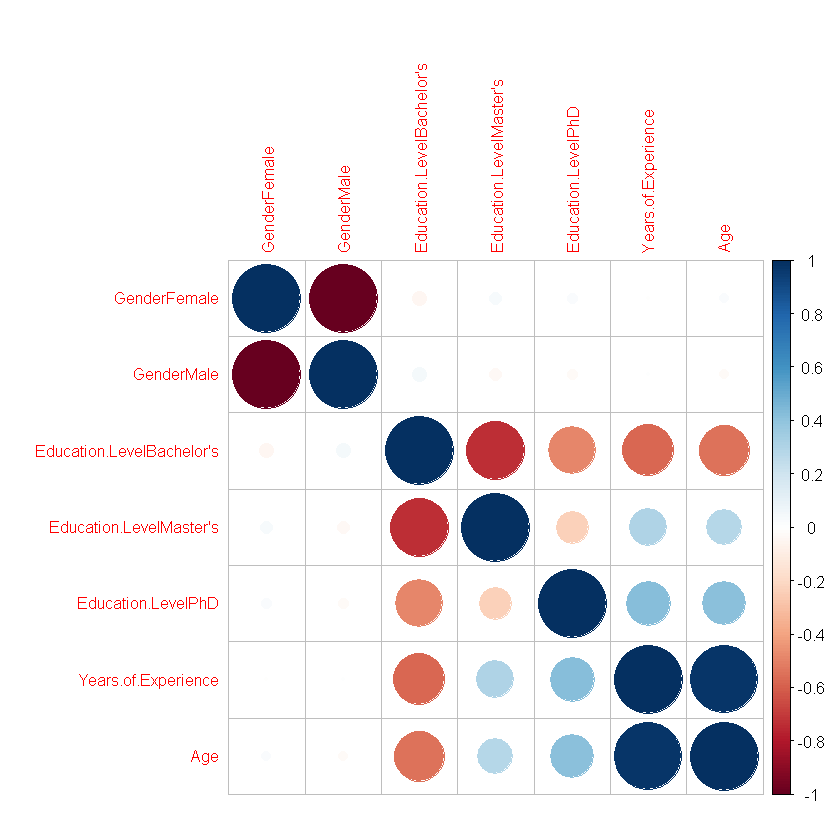

In [11]:
library(corrplot)
corrplot(cor(age_X[,-1]), tl.cex = .8)

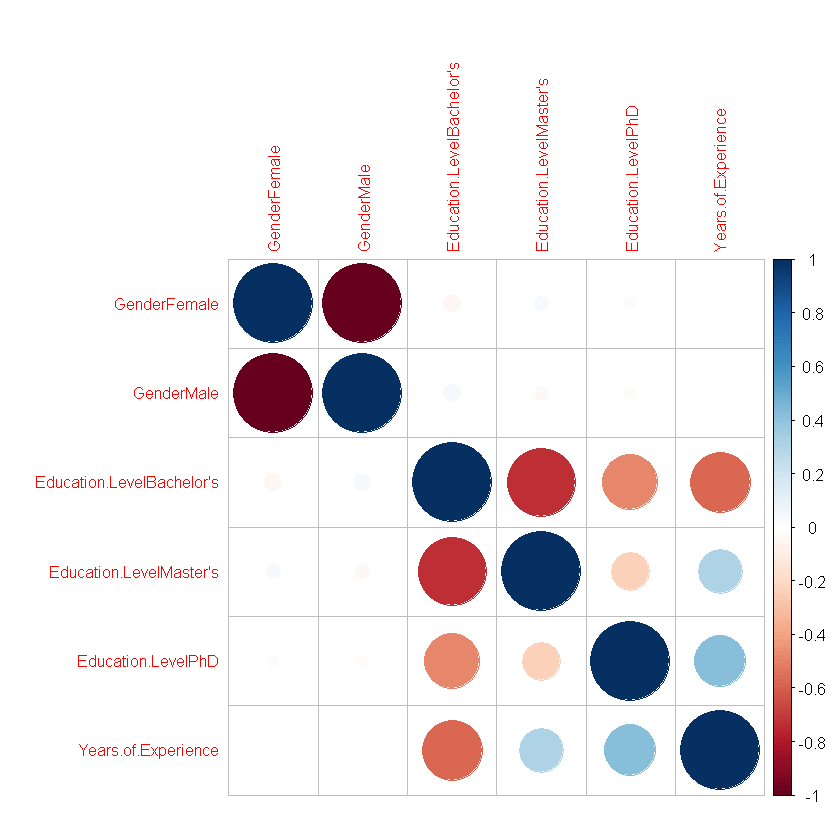

In [12]:
library(corrplot)
corrplot(cor(X[,-1]), tl.cex = .8)

In [13]:
fit = lm(form, data = salary)
agefit = lm(age_form, data = salary)

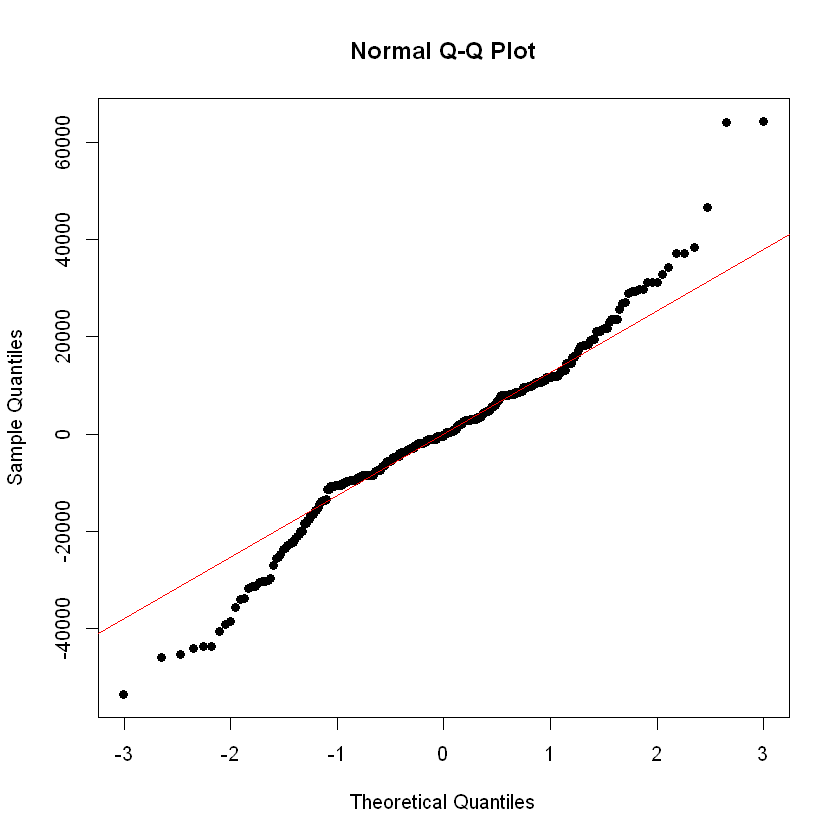

In [14]:
qqnorm(fit$residuals, pch = 16)
qqline(fit$residuals, col = 'red')

- We can see that the data is not normal enough to contain normality of residuals so we will attempt to Transform the data by taking the Log() of our salary response

In [15]:
logform = log(Salary) ~ Gender + Education.Level + Years.of.Experience 
age_log_form = log(Salary) ~ Gender + Education.Level + Years.of.Experience + Age

In [16]:
lfit = lm(logform, data = salary)
age_lfit = lm(age_log_form, data = salary)

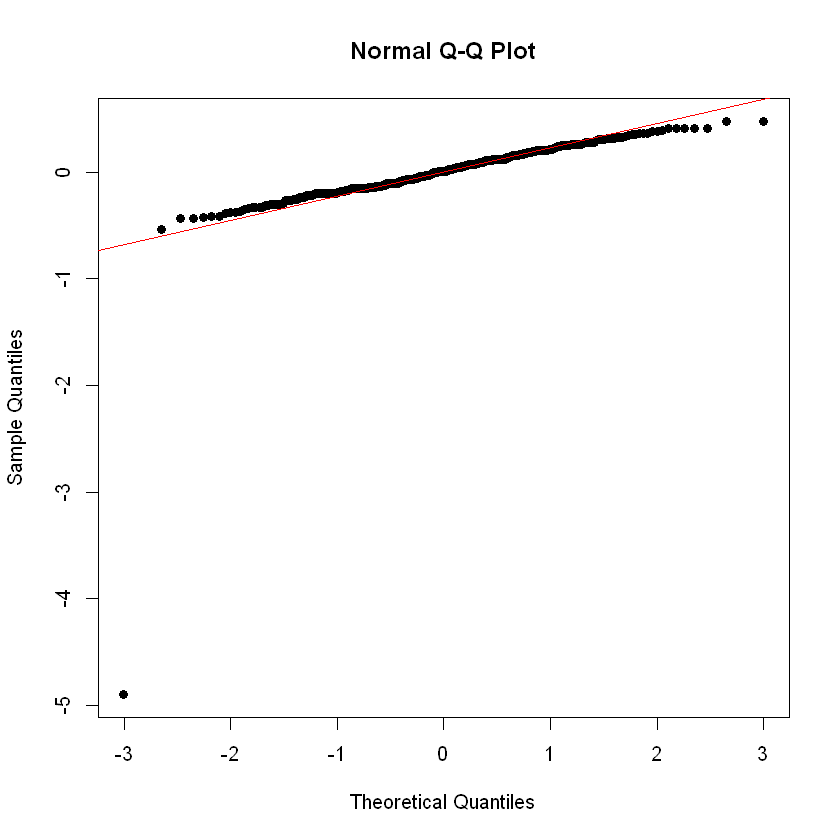

In [17]:
qqnorm(lfit$residuals, pch =16)
qqline(lfit$residuals, col = 'red')

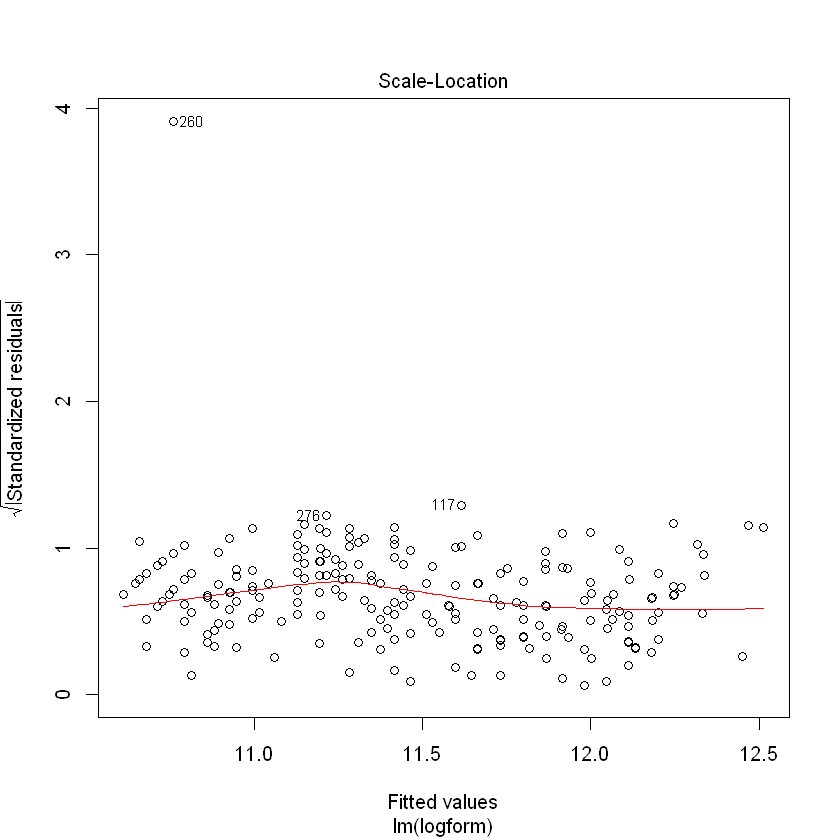

In [18]:
plot(lfit, which = 3)

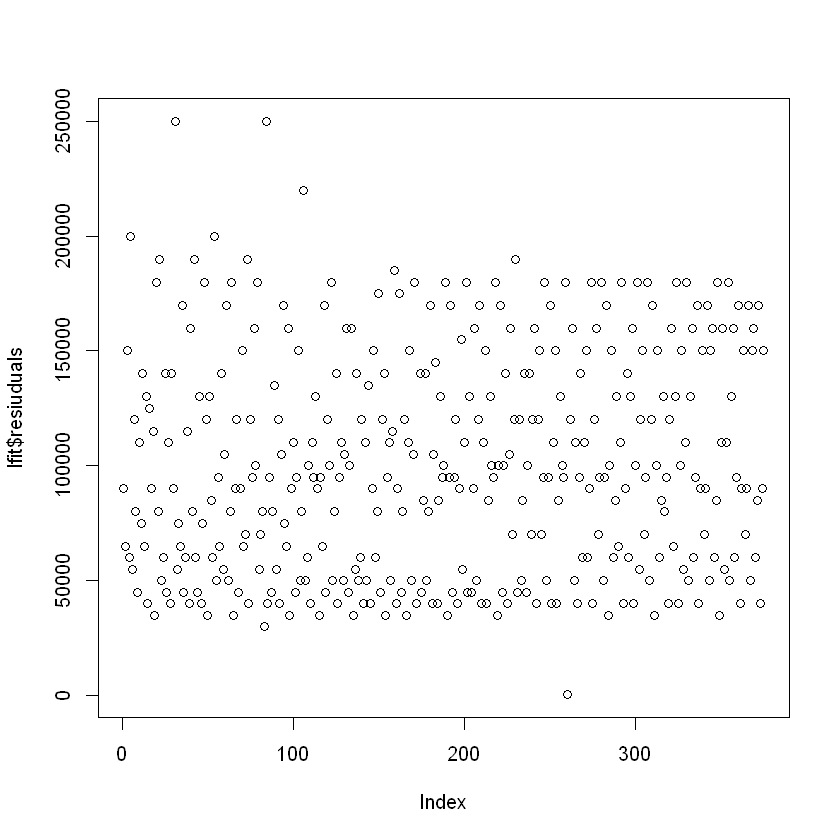

In [19]:
plot(salary$Salary, lfit$resiuduals)

In [20]:
summary(age_lfit)


Call:
lm(formula = age_log_form, data = salary)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9327 -0.1280 -0.0031  0.1393  0.4445 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.47930    0.31552  30.043  < 2e-16 ***
GenderMale               0.06118    0.03316   1.845 0.065838 .  
Education.LevelMaster's  0.20142    0.04374   4.605  5.7e-06 ***
Education.LevelPhD       0.20106    0.05860   3.431 0.000670 ***
Years.of.Experience      0.02182    0.01286   1.697 0.090512 .  
Age                      0.04198    0.01161   3.616 0.000341 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3169 on 367 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7159,	Adjusted R-squared:  0.7121 
F-statistic:   185 on 5 and 367 DF,  p-value: < 2.2e-16


In [21]:
summary(lfit)


Call:
lm(formula = logform, data = salary)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9023 -0.1462  0.0057  0.1603  0.4795 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             10.613363   0.035331 300.396  < 2e-16 ***
GenderMale               0.046497   0.033443   1.390  0.16526    
Education.LevelMaster's  0.181446   0.044096   4.115 4.79e-05 ***
Education.LevelPhD       0.183966   0.059363   3.099  0.00209 ** 
Years.of.Experience      0.066933   0.003177  21.065  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.322 on 368 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7058,	Adjusted R-squared:  0.7026 
F-statistic: 220.7 on 4 and 368 DF,  p-value: < 2.2e-16


In [22]:
confint(age_lfit, level = .95)

,2.5 %,97.5 %
(Intercept),8.858846279,10.09976267
GenderMale,-0.004025752,0.12637640
Education.LevelMaster's,0.115405674,0.28743033
Education.LevelPhD,0.085815481,0.31629535
Years.of.Experience,-0.003462775,0.04711255
Age,0.019151193,0.06480510


In [23]:
confint(lfit, level = .95)

,2.5 %,97.5 %
(Intercept),10.54388645,10.68283944
GenderMale,-0.01926598,0.11226081
Education.LevelMaster's,0.09473426,0.26815819
Education.LevelPhD,0.06723237,0.30069877
Years.of.Experience,0.06068464,0.07318103


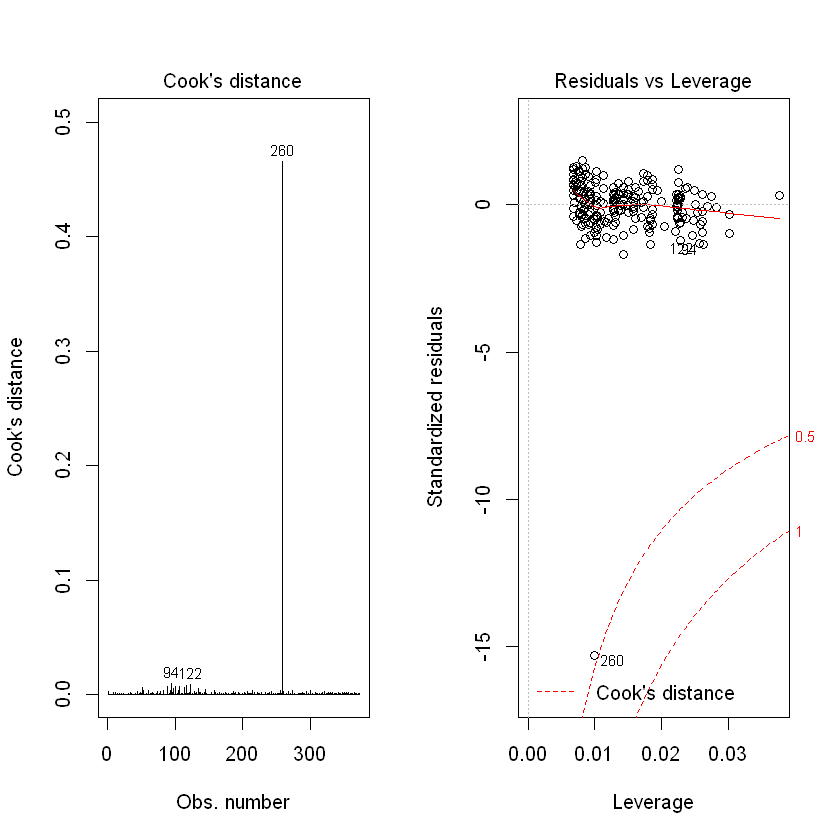

In [24]:
layout(matrix(1:2, 1, 2))
plot(lfit, which = 4:5)

In [25]:
male_master = data.frame(Gender = "Male",
                              Education.Level = "Master's", 
                              Years.of.Experience = seq(0,25))
male_bachelor = data.frame(Gender = "Male",
                              Education.Level = "Bachelor's", 
                              Years.of.Experience = seq(0,25))


age_male_master = data.frame(Gender = "Male",               #new data frame with age variable
                         Education.Level = "Master's", 
                         Years.of.Experience = seq(0,25), 
                         Age = 35)

age_male_bachelor = data.frame(Gender = "Male",             #new data framewith age variable
                               Education.Level = "Bachelor's", 
                               Years.of.Experience = seq(0,25), 
                               Age = 35)

#prediction with Age variable
male_bach_pred = exp(predict(lfit, newdata = male_bachelor, interval = "prediction"))
male_mast_pred = exp(predict(lfit, newdata = male_master, interval = "prediction"))

#predictions with age variable included for bachelors and masters
age_male_bach_pred = exp(predict(age_lfit, newdata = age_male_bachelor, interval = "prediction"))
age_male_mast_pred = exp(predict(age_lfit, newdata = age_male_master, interval = "prediction"))

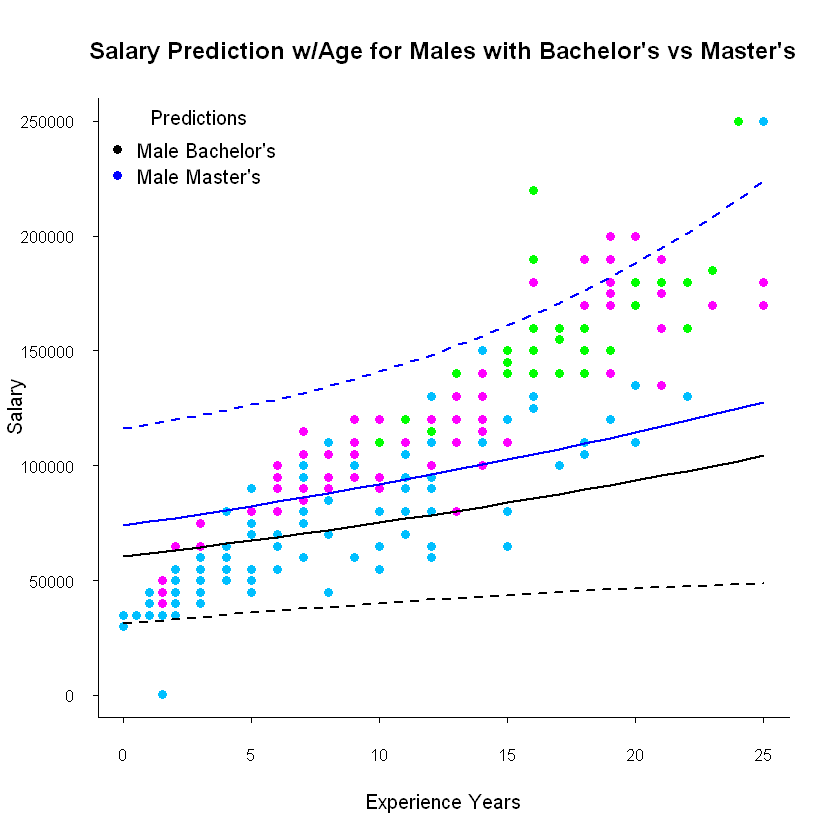

In [26]:
x = salary$Years.of.Experience
y = salary$Salary
ExpSeq = seq(0,25)

plot(x,y, type = 'n', 
     main = "Salary Prediction w/Age for Males with Bachelor's vs Master's",
     xlab = 'Experience Years', ylab = 'Salary',
     bty = 'l', las = 1, cex.axis = .8,
     tcl = -0.2)

points(x = salary$Years.of.Experience[salary$Education.Level == "Bachelor's"],
       y = salary$Salary[salary$Education.Level == "Bachelor's"], 
       pch = 16, col = 'deepskyblue')
points(x = salary$Years.of.Experience[salary$Education.Level == "Master\'s"],
       y = salary$Salary[salary$Education.Level == "Master\'s"], 
       pch = 16, col = 'magenta')
points(x = salary$Years.of.Experience[salary$Education.Level == "PhD"],
       y = salary$Salary[salary$Education.Level == "PhD"], 
       pch = 16, col = 'green')

lines(x = ExpSeq, y = age_male_bach_pred[,'fit'], col = 'black', lwd = 2)
lines(x = ExpSeq, y = age_male_bach_pred[,'upr'], col = 'black', lwd = 2, lty = 2)
lines(x = ExpSeq, y = age_male_bach_pred[,'lwr'], col = 'black', lwd = 2, lty = 2)

lines(x = ExpSeq, y = age_male_mast_pred[,'fit'], col = 'blue', lwd = 2)
lines(x = ExpSeq, y = age_male_bach_pred[,'upr'], col = 'blue', lwd = 2, lty = 2)
lines(x = ExpSeq, y = age_male_bach_pred[,'lwr'], col = 'black', lwd = 2, lty = 2)

leg_cols = c("black", "blue")
leg_sym = c(16, 16)
leg_lab = c("Male Bachelor's", "Male Master's")

legend('topleft',
       col = leg_cols, pch = leg_sym,
       legend = leg_lab, bty = "n",
       title = "Predictions")

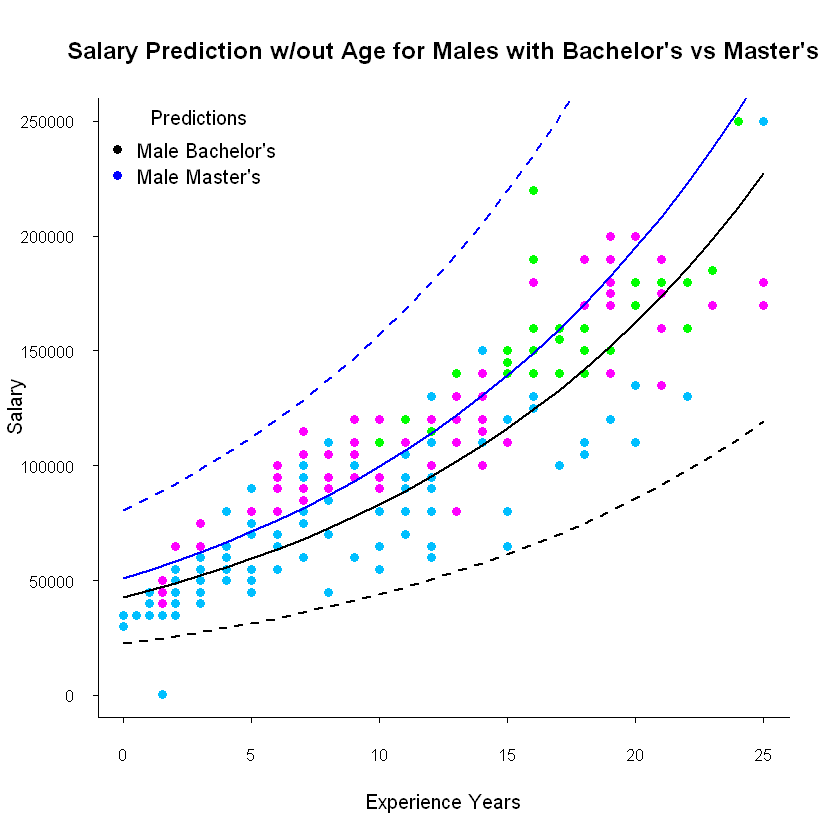

In [27]:
x = salary$Years.of.Experience
y = salary$Salary
ExpSeq = seq(0,25)

plot(x,y, type = 'n', 
     main = "Salary Prediction w/out Age for Males with Bachelor's vs Master's",
     xlab = 'Experience Years', ylab = 'Salary',
     bty = 'l', las = 1, cex.axis = .8,
     tcl = -0.2)

points(x = salary$Years.of.Experience[salary$Education.Level == "Bachelor's"],
       y = salary$Salary[salary$Education.Level == "Bachelor's"], 
       pch = 16, col = 'deepskyblue')
points(x = salary$Years.of.Experience[salary$Education.Level == "Master\'s"],
       y = salary$Salary[salary$Education.Level == "Master\'s"], 
       pch = 16, col = 'magenta')
points(x = salary$Years.of.Experience[salary$Education.Level == "PhD"],
       y = salary$Salary[salary$Education.Level == "PhD"], 
       pch = 16, col = 'green')

lines(x = ExpSeq, y = male_bach_pred[,'fit'], col = 'black', lwd = 2)
lines(x = ExpSeq, y = male_bach_pred[,'upr'], col = 'black', lwd = 2, lty = 2)
lines(x = ExpSeq, y = male_bach_pred[,'lwr'], col = 'black', lwd = 2, lty = 2)

lines(x = ExpSeq, y = male_mast_pred[,'fit'], col = 'blue', lwd = 2)
lines(x = ExpSeq, y = male_bach_pred[,'upr'], col = 'blue', lwd = 2, lty = 2)
lines(x = ExpSeq, y = male_bach_pred[,'lwr'], col = 'black', lwd = 2, lty = 2)

leg_cols = c("black", "blue")
leg_sym = c(16, 16)
leg_lab = c("Male Bachelor's", "Male Master's")

legend('topleft',
       col = leg_cols, pch = leg_sym,
       legend = leg_lab, bty = "n",
       title = "Predictions")

In [28]:
fem_bachelor = data.frame(Gender = "Female",
                              Education.Level = "Bachelor's", 
                              Years.of.Experience = seq(0,25))

#data frame with age variable for females
fem_bachelor = data.frame(Gender = "Female",
                          Education.Level = "Bachelor's", 
                          Years.of.Experience = seq(0,25),  
                          Age = 35)

fem_bach_pred = exp(predict(lfit, newdata = fem_bachelor, interval = "prediction"))

#prediction for females with agw variable included
age_fem_bach_pred = exp(predict(age_lfit, newdata = fem_bachelor, interval = "prediction"))


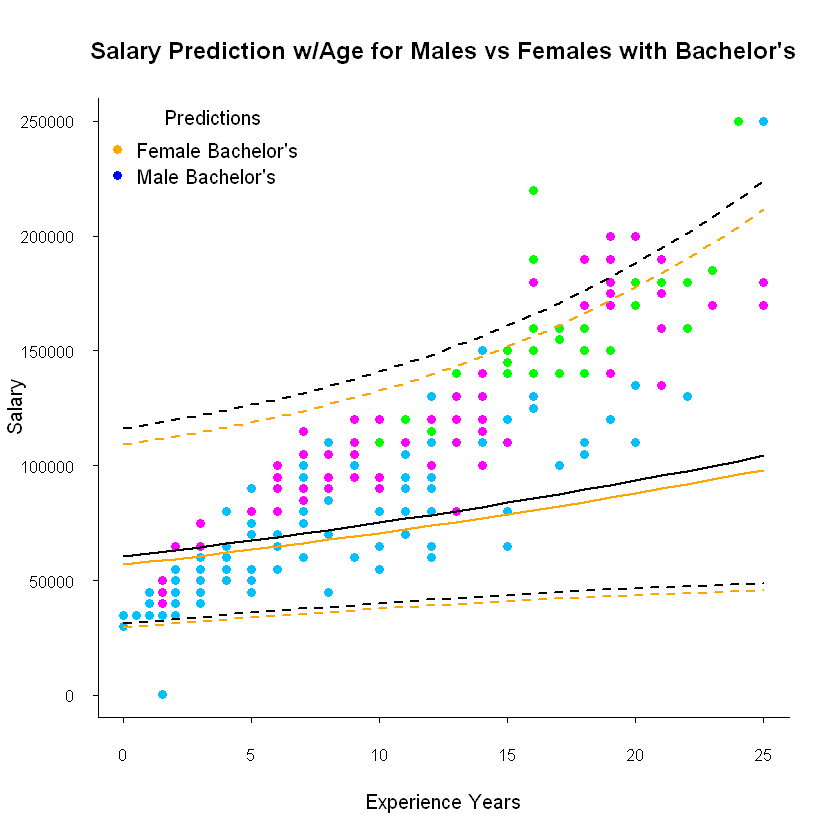

In [29]:
x = salary$Years.of.Experience
y = salary$Salary
ExpSeq = seq(0,25)

plot(x,y, type = 'n', 
     main = "Salary Prediction w/Age for Males vs Females with Bachelor's",
     xlab = 'Experience Years', ylab = 'Salary',
     bty = 'l', las = 1, cex.axis = .8,
     tcl = -0.2)

points(x = salary$Years.of.Experience[salary$Education.Level == "Bachelor's"],
       y = salary$Salary[salary$Education.Level == "Bachelor's"], 
       pch = 16, col = 'deepskyblue')
points(x = salary$Years.of.Experience[salary$Education.Level == "Master\'s"],
       y = salary$Salary[salary$Education.Level == "Master\'s"], 
       pch = 16, col = 'magenta')
points(x = salary$Years.of.Experience[salary$Education.Level == "PhD"],
       y = salary$Salary[salary$Education.Level == "PhD"], 
       pch = 16, col = 'green')
points(x = salary$Years.of.Experience[salary$Education.Level == ''],
       y = salary$Salary[salary$Education.Level == ''], 
       pch = 16, col = 'blue')

lines(x = ExpSeq, y = age_male_bach_pred[,'fit'], col = 'black', lwd = 2)
lines(x = ExpSeq, y = age_male_bach_pred[,'upr'], col = 'black', lwd = 2, lty = 2)
lines(x = ExpSeq, y = age_male_bach_pred[,'lwr'], col = 'black', lwd = 2, lty = 2)

lines(x = ExpSeq, y = age_fem_bach_pred[,'fit'], col = 'orange', lwd = 2)
lines(x = ExpSeq, y = age_fem_bach_pred[,'upr'], col = 'orange', lwd = 2, lty = 2)
lines(x = ExpSeq, y = age_fem_bach_pred[,'lwr'], col = 'orange', lwd = 2, lty = 2)

leg_cols = c("orange", "blue")
leg_sym = c(16, 16)
leg_lab = c("Female Bachelor's", "Male Bachelor's")

legend('topleft',
       col = leg_cols, pch = leg_sym,
       legend = leg_lab, bty = "n",
       title = "Predictions")

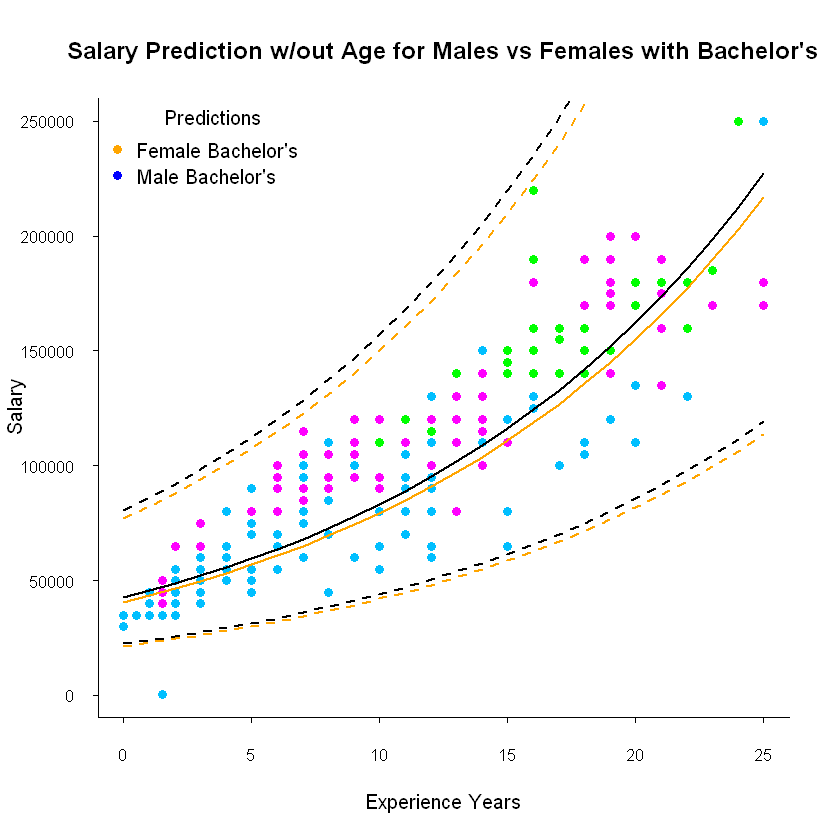

In [30]:
x = salary$Years.of.Experience
y = salary$Salary
ExpSeq = seq(0,25)

plot(x,y, type = 'n', 
     main = "Salary Prediction w/out Age for Males vs Females with Bachelor's",
     xlab = 'Experience Years', ylab = 'Salary',
     bty = 'l', las = 1, cex.axis = .8,
     tcl = -0.2)

points(x = salary$Years.of.Experience[salary$Education.Level == "Bachelor's"],
       y = salary$Salary[salary$Education.Level == "Bachelor's"], 
       pch = 16, col = 'deepskyblue')
points(x = salary$Years.of.Experience[salary$Education.Level == "Master\'s"],
       y = salary$Salary[salary$Education.Level == "Master\'s"], 
       pch = 16, col = 'magenta')
points(x = salary$Years.of.Experience[salary$Education.Level == "PhD"],
       y = salary$Salary[salary$Education.Level == "PhD"], 
       pch = 16, col = 'green')
points(x = salary$Years.of.Experience[salary$Education.Level == ''],
       y = salary$Salary[salary$Education.Level == ''], 
       pch = 16, col = 'blue')

lines(x = ExpSeq, y = male_bach_pred[,'fit'], col = 'black', lwd = 2)
lines(x = ExpSeq, y = male_bach_pred[,'upr'], col = 'black', lwd = 2, lty = 2)
lines(x = ExpSeq, y = male_bach_pred[,'lwr'], col = 'black', lwd = 2, lty = 2)

lines(x = ExpSeq, y = fem_bach_pred[,'fit'], col = 'orange', lwd = 2)
lines(x = ExpSeq, y = fem_bach_pred[,'upr'], col = 'orange', lwd = 2, lty = 2)
lines(x = ExpSeq, y = fem_bach_pred[,'lwr'], col = 'orange', lwd = 2, lty = 2)

leg_cols = c("orange", "blue")
leg_sym = c(16, 16)
leg_lab = c("Female Bachelor's", "Male Bachelor's")

legend('topleft',
       col = leg_cols, pch = leg_sym,
       legend = leg_lab, bty = "n",
       title = "Predictions")

In [31]:
forSection = log(Salary) ~ Age + Years.of.Experience + Education.Level
forSect = step(lm(forSection, data = salary),
               scope = list(upper = log(Salary) ~ Age + Years.of.Experience + Education.Level + Gender + Job.Title,
                            lower = log(Salary) ~ 1), direction = "both")

Start:  AIC=-849.9
log(Salary) ~ Age + Years.of.Experience + Education.Level

                       Df Sum of Sq    RSS     AIC
+ Job.Title           173   24.4318 12.764 -902.85
+ Gender                1    0.3418 36.854 -851.35
<none>                              37.196 -849.90
- Years.of.Experience   1    0.3817 37.578 -848.10
- Age                   1    1.1719 38.368 -840.33
- Education.Level       2    2.2597 39.456 -831.91

Step:  AIC=-902.85
log(Salary) ~ Age + Years.of.Experience + Education.Level + Job.Title

                       Df Sum of Sq    RSS     AIC
- Education.Level       2    0.0415 12.806 -905.64
- Years.of.Experience   1    0.0006 12.765 -904.83
<none>                              12.764 -902.85
+ Gender                1    0.0387 12.726 -901.98
- Age                   1    0.4268 13.191 -892.58
- Job.Title           173   24.4318 37.196 -849.90

Step:  AIC=-905.64
log(Salary) ~ Age + Years.of.Experience + Job.Title

                       Df Sum of Sq    RSS  

In [32]:
addmodel = log(Salary) ~ Gender + Education.Level + Years.of.Experience + Gender*Years.of.Experience

In [33]:
addfit = lm(addmodel, data = salary)

In [34]:
summary(addfit)


Call:
lm(formula = addmodel, data = salary)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8891 -0.1442  0.0015  0.1639  0.4776 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    10.632737   0.045440 233.994  < 2e-16 ***
GenderMale                      0.011598   0.061347   0.189  0.85015    
Education.LevelMaster's         0.181213   0.044130   4.106 4.96e-05 ***
Education.LevelPhD              0.185293   0.059439   3.117  0.00197 ** 
Years.of.Experience             0.064985   0.004283  15.172  < 2e-16 ***
GenderMale:Years.of.Experience  0.003482   0.005129   0.679  0.49770    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3223 on 367 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7062,	Adjusted R-squared:  0.7022 
F-statistic: 176.4 on 5 and 367 DF,  p-value: < 2.2e-16


In [35]:
beta = coef(addfit)
beta

(Intercept)                     GenderMale 
                  10.632737247                    0.011598040 
       Education.LevelMaster's             Education.LevelPhD 
                   0.181213011                    0.185293240 
           Years.of.Experience GenderMale:Years.of.Experience 
                   0.064984809                    0.003481682

In [36]:
male_addframe = data.frame(Gender = "Male",
                              Education.Level = "Bachelor's", 
                              Years.of.Experience = seq(0,25))

fem_addframe = data.frame(Gender = "Female",
                              Education.Level = "Bachelor's", 
                              Years.of.Experience = seq(0,25))

male_addpred = exp(predict(addfit, newdata = male_addframe, interval = "prediction"))
fem_addpred = exp(predict(addfit, newdata = fem_addframe, interval = "prediction"))

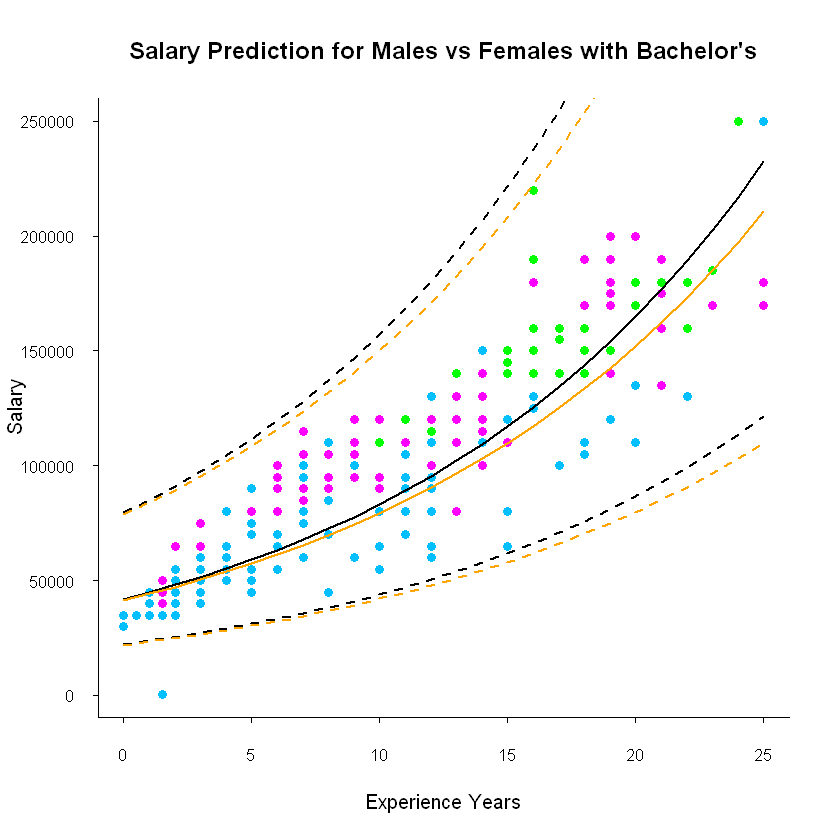

In [37]:
plot(x,y, type = 'n', 
     main = "Salary Prediction for Males vs Females with Bachelor's",
     xlab = 'Experience Years', ylab = 'Salary',
     bty = 'l', las = 1, cex.axis = .8,
     tcl = -0.2)

points(x = salary$Years.of.Experience[salary$Education.Level == "Bachelor's"],
       y = salary$Salary[salary$Education.Level == "Bachelor's"], 
       pch = 16, col = 'deepskyblue')
points(x = salary$Years.of.Experience[salary$Education.Level == "Master\'s"],
       y = salary$Salary[salary$Education.Level == "Master\'s"], 
       pch = 16, col = 'magenta')
points(x = salary$Years.of.Experience[salary$Education.Level == "PhD"],
       y = salary$Salary[salary$Education.Level == "PhD"], 
       pch = 16, col = 'green')
points(x = salary$Years.of.Experience[salary$Education.Level == ''],
       y = salary$Salary[salary$Education.Level == ''], 
       pch = 16, col = 'blue')

lines(x = ExpSeq, y = male_addpred[,'fit'], col = 'black', lwd = 2)
lines(x = ExpSeq, y = male_addpred[,'upr'], col = 'black', lwd = 2, lty = 2)
lines(x = ExpSeq, y = male_addpred[,'lwr'], col = 'black', lwd = 2, lty = 2)

lines(x = ExpSeq, y = fem_addpred[,'fit'], col = 'orange', lwd = 2)
lines(x = ExpSeq, y = fem_addpred[,'upr'], col = 'orange', lwd = 2, lty = 2)
lines(x = ExpSeq, y = fem_addpred[,'lwr'], col = 'orange', lwd = 2, lty = 2)